#### The purpose of this notebook is to perform initial exploratory data analysis on the CLV data. Keep in mind that our target column is `future_spend`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_parquet("../data/processed/clv_table_data.parquet")

In [2]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 36086 entries, 0 to 36085
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   customer_id           36086 non-null  int64          
 1   transaction_count     36086 non-null  int64          
 2   promo_code_used       36086 non-null  int64          
 3   quantity              36086 non-null  int64          
 4   total_spent           36086 non-null  float64        
 5   avg_order_value       36086 non-null  float64        
 6   first_purchase_date   36086 non-null  datetime64[us] 
 7   last_purchase_date    36086 non-null  datetime64[us] 
 8   recency               36086 non-null  timedelta64[us]
 9   customer_age          36086 non-null  timedelta64[us]
 10  payment_method_count  36086 non-null  int64          
 11  future_spend          36086 non-null  float64        
dtypes: datetime64[us](2), float64(3), int64(5), timedelta64[us](2)
memory u

In [3]:
df.duplicated().any()

np.False_

__Future spend(our target) description. About 25% did not spend again__

In [4]:
df["future_spend"].describe()

count    3.608600e+04
mean     2.275011e+06
std      3.814080e+06
min      0.000000e+00
25%      0.000000e+00
50%      7.180870e+05
75%      2.811686e+06
max      5.152548e+07
Name: future_spend, dtype: float64

__Distribution of average spending per customer__

In [5]:
(df["total_spent"] / df["transaction_count"]).describe()

count    3.608600e+04
mean     1.738991e+06
std      6.019733e+06
min      2.745000e+04
25%      2.902960e+05
50%      5.414944e+05
75%      1.322951e+06
max      4.239979e+08
dtype: float64

__The data is skewed a lot to the right, very few customers spent a lot, not out of the ordinary. A small number of customers spend really large amounts__

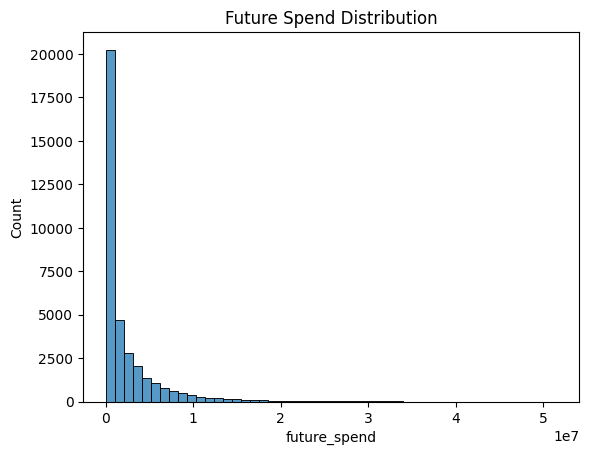

In [6]:
plt.figure()
sns.histplot(df["future_spend"], bins=50)
plt.title("Future Spend Distribution")
plt.show()


__Here's a brief comparison of transactions between customers that made and those that didn't make a transaction during the prediction window__

In [7]:
df.groupby(df["future_spend"] > 0)[
    ["transaction_count", "total_spent", "recency", "customer_age"]
].mean()


,transaction_count,total_spent,recency,customer_age
future_spend,,,,
False,1.281322,2.272575e+06,147 days 05:27:51.325182,212 days 11:44:00.944632
True,8.789257,1.538506e+07,44 days 01:34:32.745886,280 days 10:24:16.081497


__Distribution of features shows that higher value customers make more transactions and are very few, which is normal__

__Most customers use about about 1-2 payment methods__

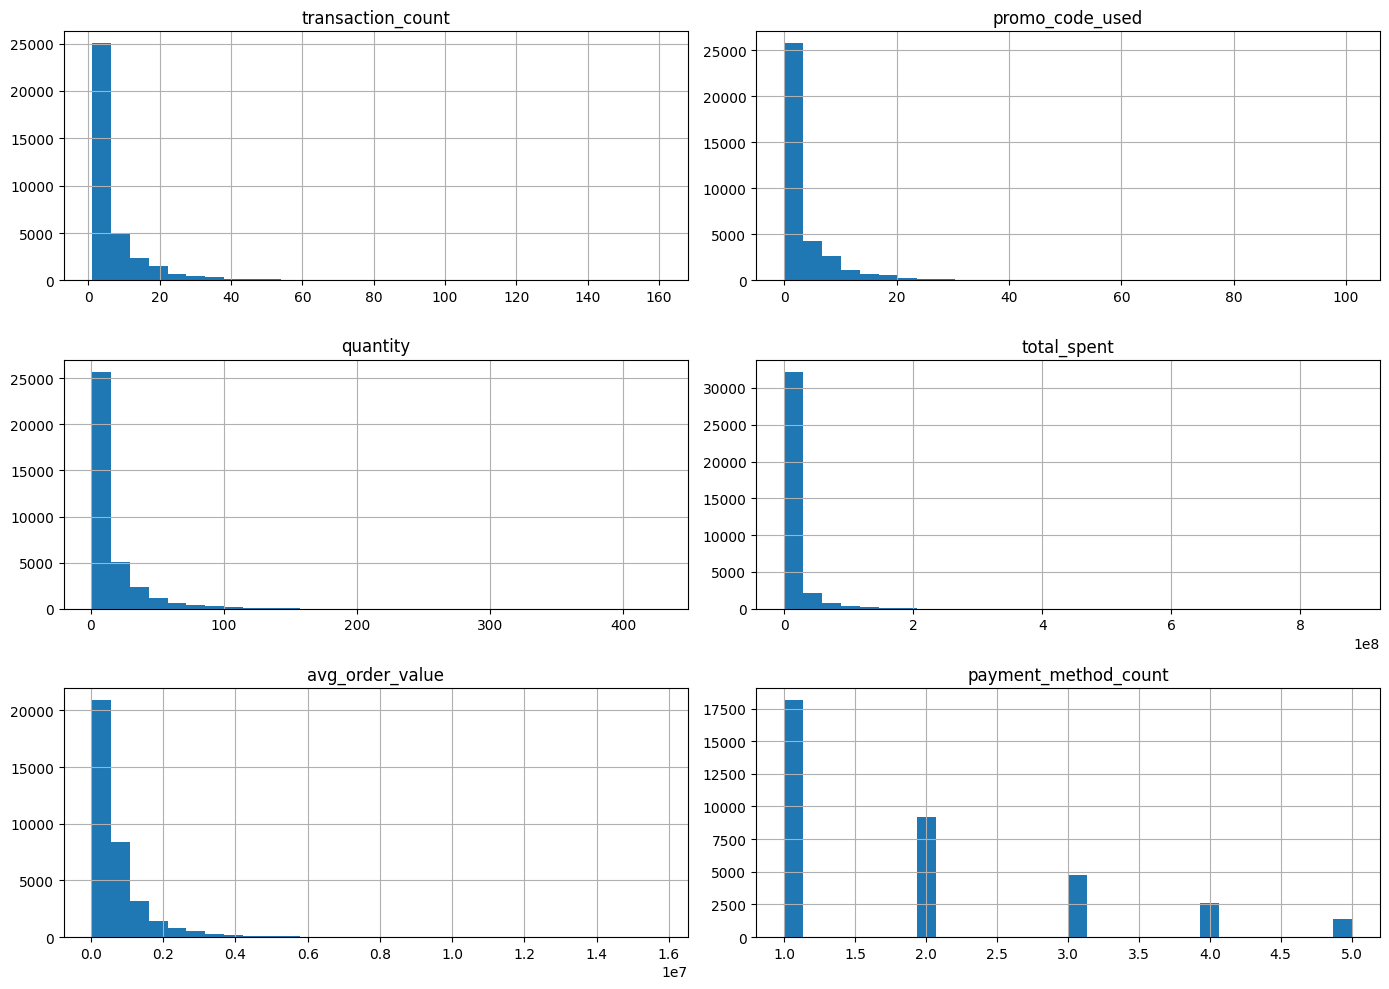

In [8]:
num_cols = [
    "transaction_count",
    "promo_code_used",
    "quantity",
    "total_spent",
    "avg_order_value",
    "payment_method_count"
]

df[num_cols].hist(figsize=(14,10), bins=30)
plt.tight_layout()


__Let's check out how some of our features relate with the future spend of a customer using the RFM approach__
+ Recency: Time since last transaction
+ Frequency: Number of transactions made within a historical period
+ Monetary: How much has been spent so far


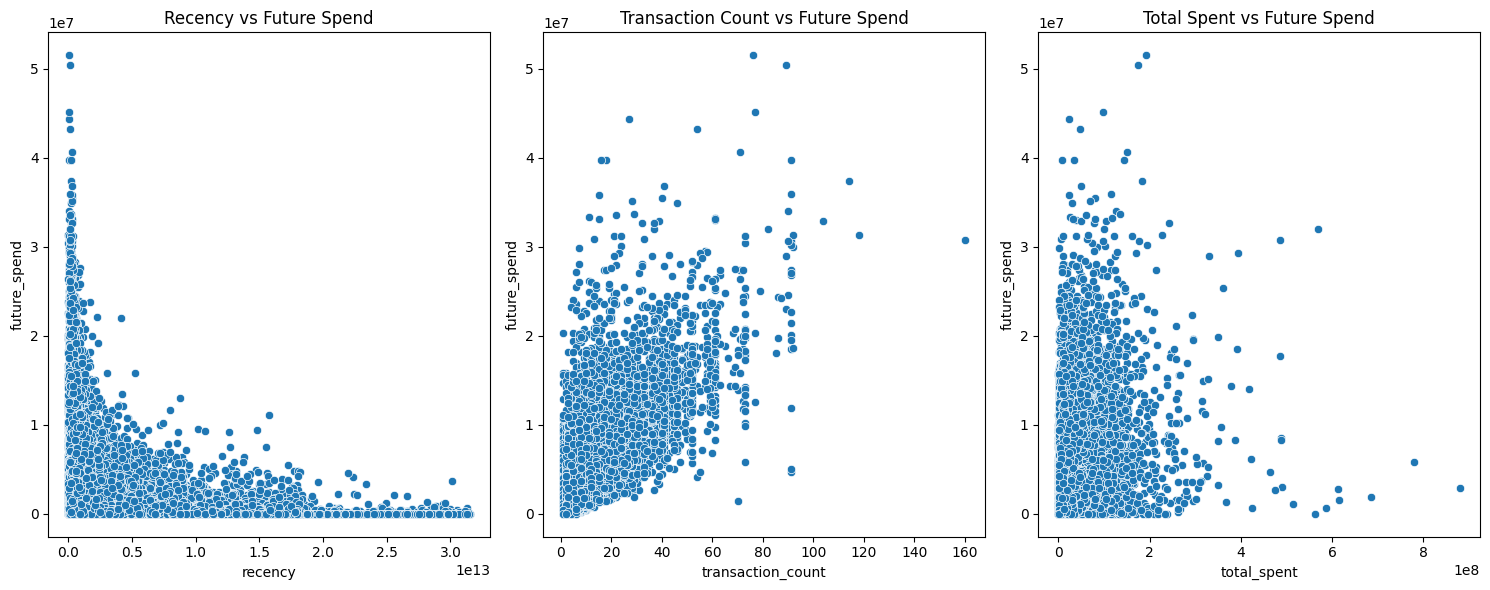

In [9]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# sns.scatterplot(x=df["recency"], y=df["future_spend"], ax=axes[0, 0])
# axes[0, 0].set_title("Recency vs Future Spend")

# sns.scatterplot(x=df["transaction_count"], y=df["future_spend"], ax=axes[0, 1])
# axes[0, 1].set_title("Transaction Count vs Future Spend")

# sns.scatterplot(x=df["total_spent"], y=df["future_spend"], ax=axes[1, 0])
# axes[1, 0].set_title("Total Spent vs Future Spend")

# sns.scatterplot(x=df["customer_age"], y=df["future_spend"], ax=axes[1, 1])
# axes[1, 1].set_title("Customer Age vs Future Spend")

# plt.tight_layout()
# plt.show()




fig, axes = plt.subplots(1, 3, figsize=(15, 6))

sns.scatterplot(x=df["recency"], y=df["future_spend"], ax=axes[0])
axes[0].set_title("Recency vs Future Spend")

sns.scatterplot(x=df["transaction_count"], y=df["future_spend"], ax=axes[1])
axes[1].set_title("Transaction Count vs Future Spend")

sns.scatterplot(x=df["total_spent"], y=df["future_spend"], ax=axes[2])
axes[2].set_title("Total Spent vs Future Spend")

plt.tight_layout()
plt.show()

#### 1. Recency vs Future Spend
- A strong inverse relationship is observed between recency and future spend.
- Customers who purchased more recently tend to have significantly higher future spend.

__Recency is a strong signal for customer engagement and future value.__


#### 2. Transaction Count vs Future Spend
- Customers with higher transaction counts generally spend more in the future, but with high variance.
- High transaction volume alone does not guarantee high future spend.


#### 3. Total Historical Spend vs Future Spend
- Total historical spend shows a weak-to-moderate positive relationship with future spend.



#### 4. Customer Age vs Future Spend
- Customer age shows little to no clear correlation with future spend.





Taking the Recency-Frequency-Monetary plot into consideration:
- Recency is the strongest individual predictor of how much a customer will spend in the future.
- Frequency and monetary features add value but exhibit high variance.